Saving alert.jpg to alert.jpg
 alert.jpg  ALERT  (Eyes detected: 2)


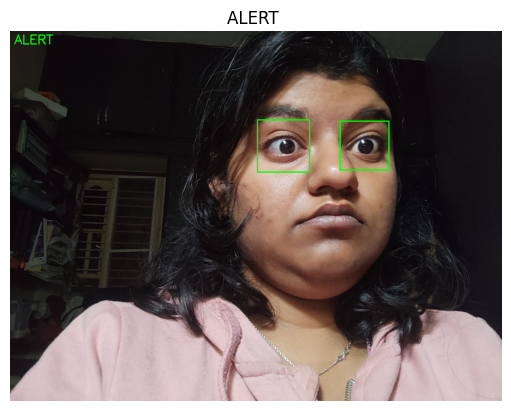

In [ ]:
import cv2
from google.colab import files
import matplotlib.pyplot as plt

# Load Haar cascade for eye detection
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

def detect_drowsiness(image_path):
    # Load image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect eyes
    eyes = eye_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)

    # Decision logic
    if len(eyes) >= 2:
        status = "ALERT "
        color = (0, 255, 0)
    elif len(eyes) == 1:
        status = "LOW ALERT "
        color = (0, 255, 255)
    else:
        status = "DROWSY "
        color = (0, 0, 255)

    # Draw results
    for (x, y, w, h) in eyes:
        cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)

    cv2.putText(image, status, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

    # Convert to RGB for display
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image_rgb, status, len(eyes)

# Upload and analyze
uploaded = files.upload()
for filename in uploaded.keys():
    result_img, status, eye_count = detect_drowsiness(filename)
    print(f" {filename}  {status} (Eyes detected: {eye_count})")
    plt.imshow(result_img)
    plt.axis('off')
    plt.title(status)
    plt.show()
